对训练数据进行基本分析

# 导入数据
链接云盘

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


导入数据

In [2]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/data/track1/track1_round1_train_20210222.csv', sep="\|,\|",header=None,names=['id','text','label'])
test_df = pd.read_csv('/content/drive/MyDrive/data/track1/track1_round1_testA_20210222.csv', sep="\|,\|",header=None,names=['id','text'])

# train_df = pd.read_csv('/content/drive/MyDrive/data/News classification/train_set.csv', sep='\t', nrows=100) # 读取的行数

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until



查看数据

In [3]:
train_df.head()

,id,text,label
0,0,623 328 538 382 399 400 478 842 698 137 492 26...,2
1,1,48 328 538 382 809 623 434 355 382 382 363 145...,NaN
2,2,623 656 293 851 636 842 698 493 338 266 369 69...,15
3,3,48 328 380 259 439 107 380 265 172 470 290 693...,NaN
4,4,623 328 399 698 493 338 266 14 177 415 511 647...,16


In [4]:
test_df.head()

,id,text
0,0,852 328 697 538 142 355 582 800 728 4 647 169 ...
1,1,380 358 343 654 171 832 47 832 690 693 48 563 ...
2,2,751 335 834 582 717 583 585 693 623 328 107 38...
3,3,623 328 649 582 488 12 578 623 538 382 382 265...
4,4,83 293 398 797 382 363 145 424 693 698 800 691...


# 文本分析


In [5]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count    10000.000000
mean        42.564800
std         18.349127
min          5.000000
25%         30.000000
50%         39.000000
75%         53.000000
max        105.000000
Name: text_len, dtype: float64


In [6]:
test_df['text_len'] = test_df['text'].apply(lambda x: len(x.split(' ')))
print(test_df['text_len'].describe())

count    3000.000000
mean       40.409667
std        17.695561
min         4.000000
25%        28.000000
50%        37.000000
75%        50.000000
max       102.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

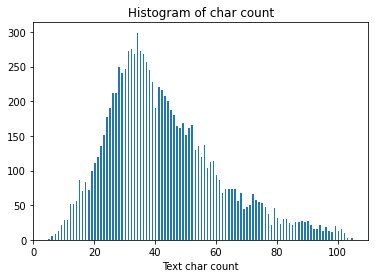

In [7]:
import matplotlib.pyplot as plt
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 1.0, 'Histogram of char count')

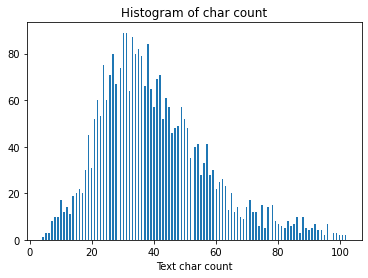

In [8]:
_ = plt.hist(test_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

In [12]:
import numpy as np
np.percentile(train_df['text_len'].tolist(), 99)

96.0

# 字符分析


In [9]:
vocab_train=[]
for i in range(20):
    word_sequence = " ".join(train_df['text'][i*10000:(i+1)*10000]).split() # 转为列表
    vocab_train.extend(list(set(word_sequence)))
vocab_train = list(set(vocab_train))
print(len(vocab_train))


858


In [10]:
vocab_test=[]
for i in range(20):
    word_sequence = " ".join(test_df['text'][i*10000:(i+1)*10000]).split() 
    vocab_test.extend(list(set(word_sequence)))
vocab_test = list(set(vocab_test))
print(len(vocab_test))

858


共

In [11]:
vocab=[]
vocab.extend(vocab_train)
vocab.extend(vocab_test)
vocab = list(set(vocab))
print(len(vocab))

858
